# Linear Regression

Linear Regression is a statistical approach for modeling the relationship between a dependent variable and one or more independent variables. The core idea is to obtain a line that best fits the data points on a plot, which represents the relationship between the variables.

How It Works:

- **Establishing Relationship**: It assumes a linear relationship between the input variables (X) and the single output variable (y). When there is a single input variable, this method is referred to as simple linear regression. For more than one input variable, the process is called multiple linear regression.
- **Least Squares Method**: Linear regression finds the line of best fit through the data points that minimizes the sum of the squared differences (residuals) between the observed values and the values predicted by the line. This is known as the least squares method.
- **Coefficients Estimation**: It estimates the coefficients of the linear equation, involving one or more independent variables, that best predict the value of the dependent variable.
- **Intercept and Slope**: The model produces an equation that includes a slope and an intercept. The slope indicates the steepness of the line and the intercept indicates where it intersects the y-axis.

Main Uses:

- **Trend Analysis**: Commonly used in business for sales forecasting and market trend analysis.
- **Risk Assessment**: Useful in finance and insurance sectors for risk assessment and pricing models.
- **Real Estate**: Used to predict housing prices based on features like size, location, etc.
- **Healthcare**: Can help in understanding the relationship between drug dosage and blood pressure levels.
- **Economics**: Used for predicting economic indicators like GDP growth.

Linear Regression is ideal for cases where a simple yet effective solution is needed for predicting quantitative outcomes. It is particularly useful when there is a clear linear relationship between the variables. While it has limitations in handling non-linear relationships and complex interactions between variables, it serves as a foundational tool for understanding and predicting quantitative data.







In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("./filez/USA_Housing.csv")
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


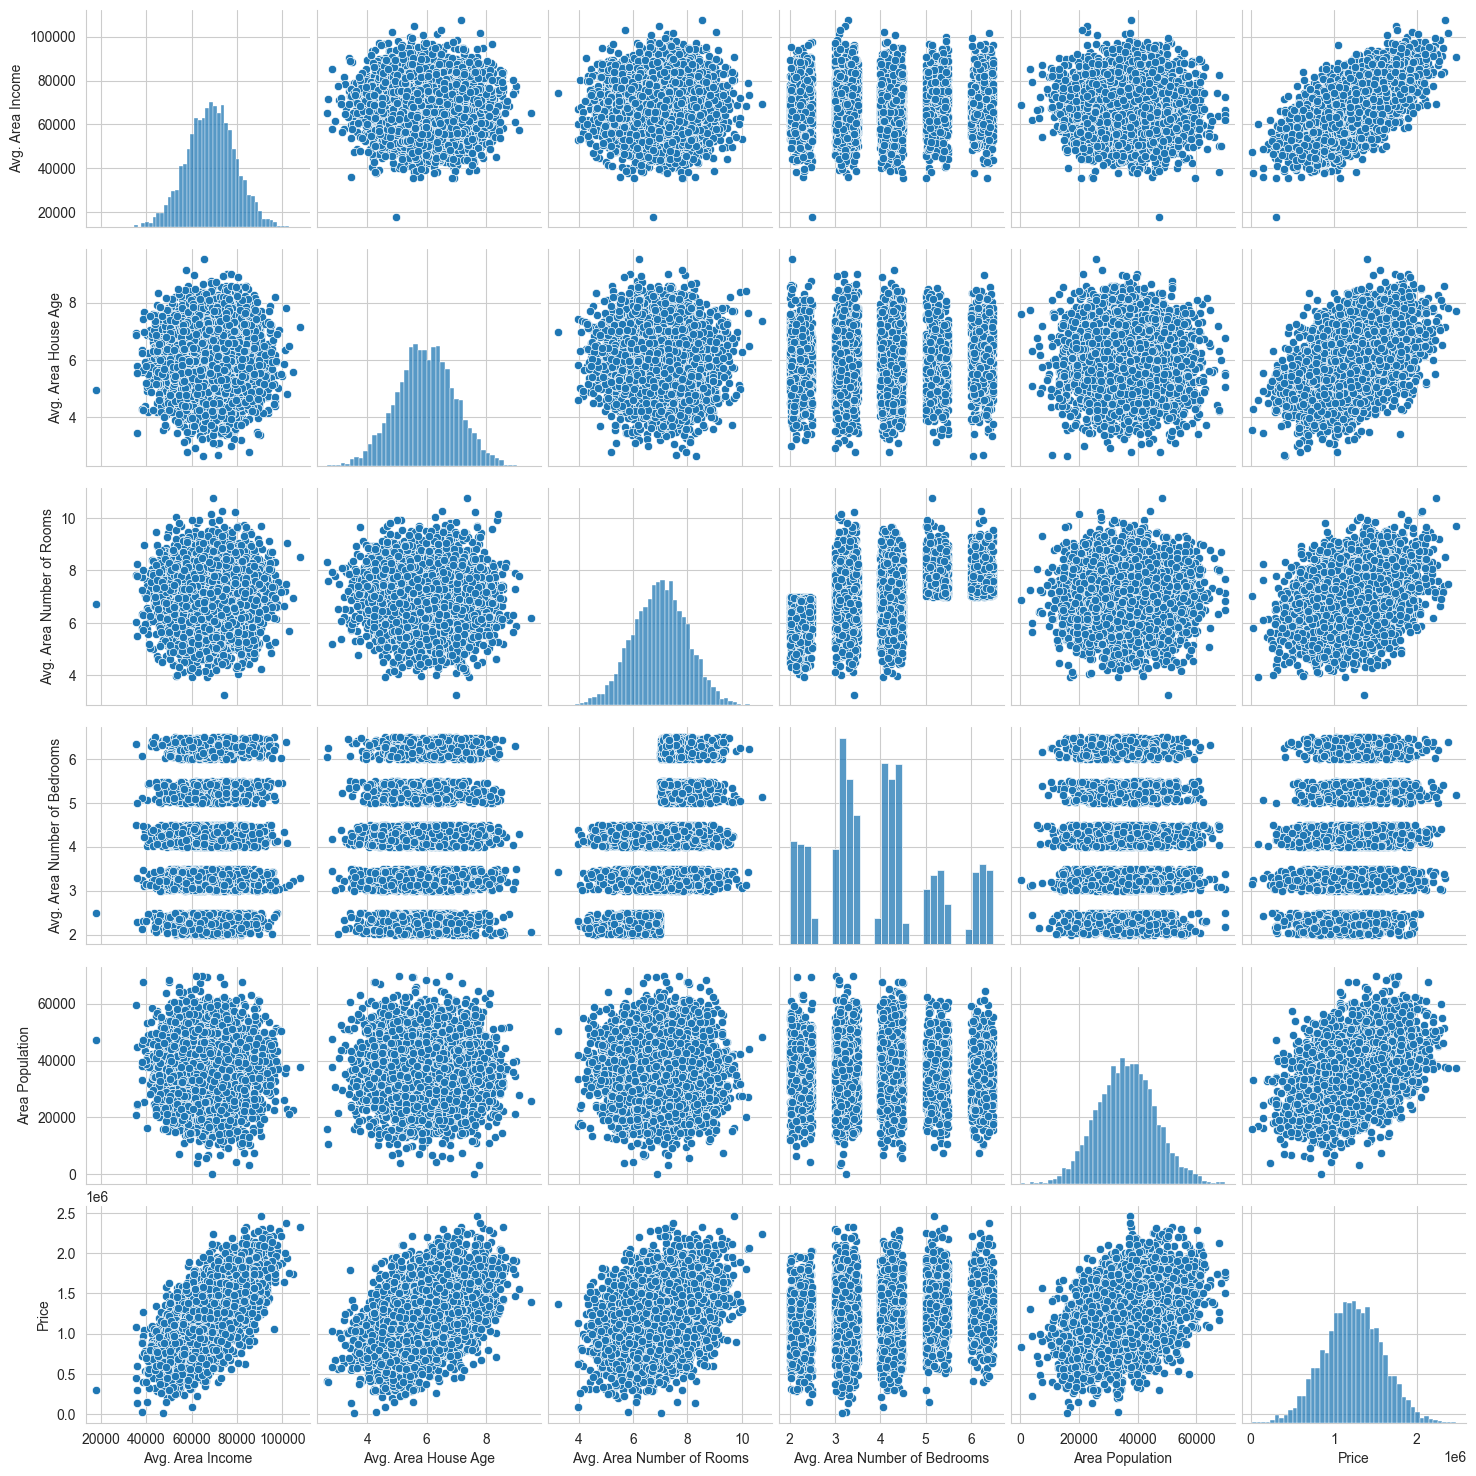

In [5]:
sns.pairplot(df)

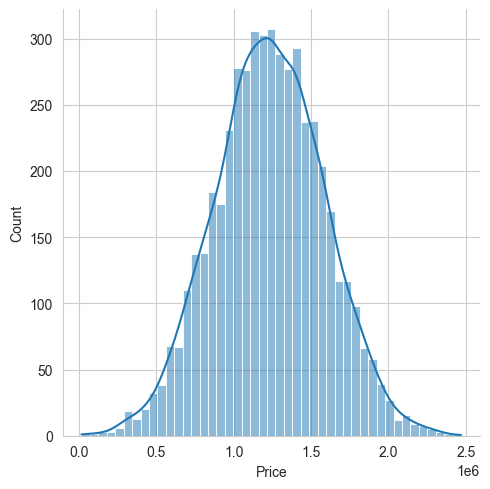

In [6]:
sns.displot(df["Price"], kde=True)

In [7]:
# correlation for all numeric fields
"""
Correlation measures the strength and direction of a linear relationship between two variables:

Value = 1: This indicates a perfect positive correlation. As one variable increases,
        the other variable increases in a perfectly linear manner.
Value close to 1: This suggests a strong positive correlation. As one variable increases,
        the other tends to increase as well, but not perfectly.
Value = -1: This indicates a perfect negative correlation. As one variable increases,
        the other variable decreases in a perfectly linear manner.
Value close to -1: This suggests a strong negative correlation. As one variable increases,
        the other tends to decrease.
Value = 0: This indicates no correlation. The variables do not have a linear relationship.


In statistical terms, the strength of a correlation is often categorized as follows:

0 to 0.19:      Very weak or negligible correlation.
0.20 to 0.39:   Weak, low correlation.
0.40 to 0.59:   Moderate correlation.
0.60 to 0.79:   Strong, high correlation.
0.80 to 1:      Very strong, very high correlation.

Correlation does not imply causation; High correlation between two variables does not mean
that one variable causes the other to change.
"""
df_corr = df.select_dtypes(include=[np.number]).corr()
df_corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

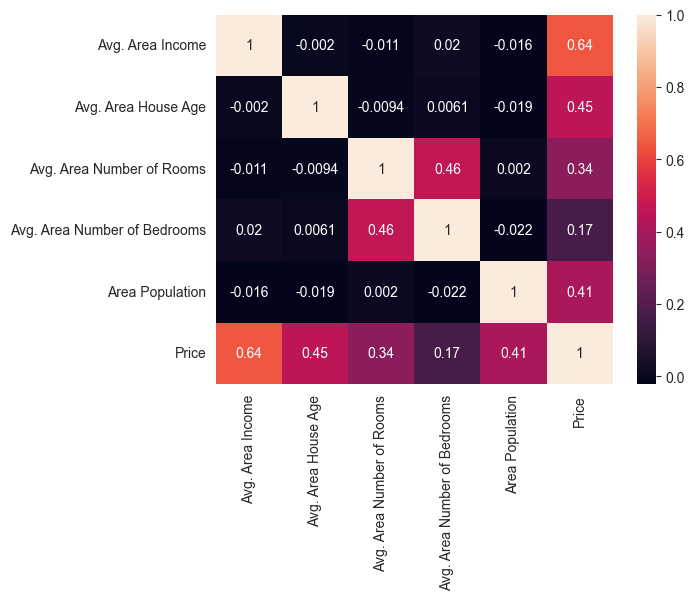

In [8]:
# See columns correlation visually
sns.heatmap(df_corr, annot=True)

## Linear Regression

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
"""
X represents the features (independent variables) that the model will use
  to learn patterns (house characteristics and area demographics)
y is the target variable (dependent variable) that we want to predict (house price)
"""

# X array : Features to train on, excluding string cols and price (y)
X = df[
    [
        "Avg. Area Income",
        "Avg. Area House Age",
        "Avg. Area Number of Rooms",
        "Avg. Area Number of Bedrooms",
        "Area Population",
    ]
]

# y array: Target variable (price column that we're trying to predict)
y = df["Price"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Prepare training & testing data
"""
train_test_split: Splits arrays or matrices into random train and test subsets
Specifically, splits the features (X) and the target variable (y) into two sets each:
   - one for training the model (X_train, y_train)
   - one for testing it (X_test, y_test).
test_size=0.4 specifies that 40% of the data will be used for the test set,
    and implicitly, 60% will be used for the training set.
random_state=101 is set for reproducibility, meaning the split will be the same every time 
    the code is run, which is important for consistent results across different runs.

Output:
X_train and y_train will be used to train the model.
X_test and y_test will be used to evaluate the model's performance, 
    to see how well it predicts new, unseen data.
"""

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=101
)

# X_train, y_train -> 3000 random records each (60%)
# X_test, x_test -> 2000 random records each (40%)


In [13]:
# Train the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [14]:
# Fit model with the training data
"""
The fit method is a standard term used in machine learning which refers to the process of "fitting" 
a model to a set of training data. During this process, the model adjusts its parameters to minimize
the difference between the predicted and actual values of the target variable.

For a LinearRegression model, fitting the model is about finding the coefficients for each feature
that result in the best prediction. The coefficients after fitting the model are stored in the 
`coef_` attribute of the LinearRegression object
"""

lm.fit(X_train, y_train)
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

- **copy_X**=True (Whether to copy the input X array): If True, X will be copied; otherwise, it may be overwritten.
- **fit_intercept**=True (Whether to calculate the intercept for this model): If set to False, no intercept will be used in calculations.
- **n_jobs**=None (Number of jobs to use for computation): None means 1 unless in a joblib.parallel_backend context.
- **positive**=False (Whether to force the coefficients to be positive): Relevant for certain types of regularization or constraints.

In [15]:
# Intercept
"""
In a linear regression model, the intercept_ represents the value of the dependent variable
when all the independent variables are equal to zero. It is the point where the regression
line crosses the y-axis.
@dev: in many real-world scenarios, like housing prices, it's not practical or possible for
    all features to be zero (e.g., a house cannot have zero rooms or zero area).
@def: The term "intercept" comes from the graphical representation of linear equations. When graphed,
    the intercept is the point where the line crosses, or "intercepts," the y-axis on a graph. 
"""

lm.intercept_

-2640159.796851912

In [16]:
# Coefficients
"""
In linear regression, the coefficients represent the relationship between each independent
variable (feature) and the dependent variable (target). They signify how much the dependent
variable is expected to increase when the independent variable increases by one, holding all
other independent variables constant.
"""

# show coefficients in non-scientific notation temporarily, without updating the array ;)
with np.printoptions(suppress=True, precision=2):
    print(lm.coef_)

# Reminder of features:
# - "Avg. Area Income"
# - "Avg. Area House Age"
# - "Avg. Area Number of Rooms"
# - "Avg. Area Number of Bedrooms"
# - "Area Population"

[    21.53 164883.28 122368.68   2233.8      15.15]


In [17]:
# Create df with the coefficient for each feature
# eg: 1 unit increase in 'Avg.Area Income' is associated with
# 21.5 increase in price, if we hold all other features fixed
# @dev: data is not real!

cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coeff"])
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Predictions

The overall process you described is a typical workflow in machine learning, specifically for predictive modeling:

- **Splitting the Data into Train and Test Sets**: This is done to train the model on one set of data (the training set) and then test its performance on a separate set of data (the test set) that it hasn't seen before. This helps in evaluating the model's ability to generalize to new, unseen data.

- **Training the Model**: The model (in your case, a linear regression model) learns the relationship between the features (e.g., area, number of rooms) and the target variable (e.g., house price) in the training set.

- **Making Predictions**: Once trained, the model is used to make predictions on the test set. These predictions are then compared to the actual values to assess the model's performance.

- **Purpose of the Predictions**: The predictions are used to understand how well the model can estimate the target variable (house prices) based on the features. This can be used for decision-making, forecasting, and gaining insights into the factors that influence house prices.

In [18]:
# predict the target values using the trained model
"""
predicted house prices based on our linear regression model. Each value in this
array corresponds to a predicted price for a house, with the prediction being based
on the features (like "Avg. Area Income", "Avg. Area House Age", etc.) of each house
in our X_test dataset.
"""
predictions = lm.predict(X_test)
predictions  # 2000 predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

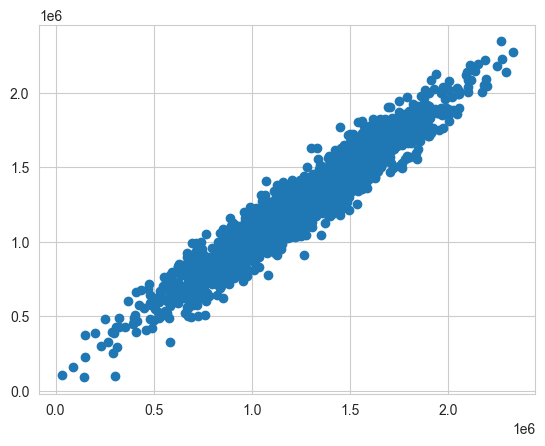

In [19]:
plt.scatter(y_test, predictions)
# Data looks very aligned

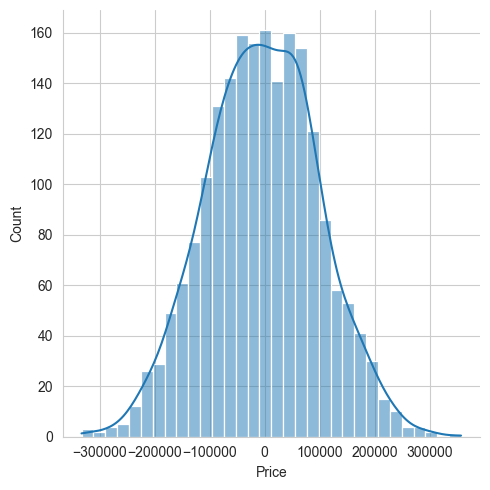

In [20]:
# histogram of the residuals. They look to be normally distributed,
# so the choosen model seems OK
sns.displot((y_test - predictions), kde=True)

### Evaluate model accuracy:

In [21]:
from sklearn import metrics

In [22]:
"""
Mean Absolute Error (MAE): This is the average of the absolute differences between
the predicted values and the actual values. In your case, the MAE is approximately 82,288.22.
This means that on average, the model's predictions are off by about 82,288 units (which,
in the context of our model, is likely to be in the currency you're working with).
"""

metrics.mean_absolute_error(y_test, predictions)

82288.22251914954

In [23]:
"""
Mean Squared Error (MSE): MSE is similar to MAE but squares the difference before averaging.
This MSE is approximately 10,460,958,907.21. Squaring the errors gives more weight to larger errors,
making this metric more sensitive to outliers compared to MAE.
"""

metrics.mean_squared_error(y_test, predictions)

10460958907.2095

In [24]:
"""
Root Mean Squared Error (RMSE): This is the square root of the MSE, which in our case is
about 102,278.83. RMSE is in the same units as the predicted values, making it a bit more
interpretable than MSE.
"""

np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291152

In [25]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [26]:
"""
Conclusion:

The mean absolute error (MAE) of approximately $82,288, when considered against
the context of our dataset, can be evaluated as follows:

Average House Price: The average house price in our dataset is around $1,232,073.
    The MAE represents about 6.7% of this value.
Standard Deviation: The standard deviation of house prices is approximately $353,117.
    The MAE is significantly lower than this, suggesting that the model's errors are
    smaller than the natural variability in house prices.

Considering these points, the MAE seems to be relatively modest in comparison to the
average house price and the variability (standard deviation) of the prices. However,
whether this level of accuracy is acceptable depends on the specific requirements of
the application. For some real estate decisions, even a 6.7% error margin might be too
high, while for others, it could be considered sufficiently accurate.
"""

"\nConclusion:\n\nThe mean absolute error (MAE) of approximately $82,288, when considered against\nthe context of our dataset, can be evaluated as follows:\n\nAverage House Price: The average house price in our dataset is around $1,232,073.\n    The MAE represents about 6.7% of this value.\nStandard Deviation: The standard deviation of house prices is approximately $353,117.\n    The MAE is significantly lower than this, suggesting that the model's errors are\n    smaller than the natural variability in house prices.\n\nConsidering these points, the MAE seems to be relatively modest in comparison to the\naverage house price and the variability (standard deviation) of the prices. However,\nwhether this level of accuracy is acceptable depends on the specific requirements of\nthe application. For some real estate decisions, even a 6.7% error margin might be too\nhigh, while for others, it could be considered sufficiently accurate.\n"

### Make a prediction

In [27]:
new_data = pd.DataFrame(
    {
        "Avg. Area Income": [60000],
        "Avg. Area House Age": [5],
        "Avg. Area Number of Rooms": [7],
        "Avg. Area Number of Bedrooms": [4],
        "Area Population": [30000],
    }
)

# Making a prediction with the new data
prediction = lm.predict(new_data)
print(f"Predicted House Price: {prediction[0]}")

Predicted House Price: 795981.6981853768
